# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [382]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.stats import ttest_ind
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from wordcloud import WordCloud
from IPython.display import display

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

# Regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import Lasso
import sklearn.svm

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


import joblib
# Hide warnings
import warnings
warnings.filterwarnings('ignore')
data_file_path = 'data/train.csv'
df = pd.read_csv(data_file_path)
df.describe()


,Y
count,7494.000000
mean,4.188711
std,0.547055
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [383]:
df.sample(5)

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
4230,Puck AI Personal Assistant Robot,PRODUCTIVITY,22,26M,"1,000+",Free,0,Everyone,Productivity,"November 2, 2017",1.5,4.0.3 and up,4.1
3718,Twitch: Livestream Multiplayer Games & Esports,FAMILY,2133047,Varies with device,"50,000,000+",Free,0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device,4.6
2972,XX HD Video downloader-Free Video Downloader,VIDEO_PLAYERS,7624,6.0M,"1,000,000+",Free,0,Everyone,Video Players & Editors,"April 20, 2018",1.9,4.0.3 and up,4.1
8346,哈哈姆特不EY,COMMUNICATION,239,18M,"10,000+",Free,0,Everyone,Communication,"July 31, 2018",1.3.4,4.4 and up,NaN
4761,"AY Recorder - Screen Recorder, Live, Video Editor",TOOLS,12,3.8M,500+,Free,0,Everyone,Tools,"May 15, 2017",2.2,5.0 and up,4.3


In [384]:
df.columns

Index(['App Name', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genre', 'Last Updated', 'Current Version',
       'Android Version', 'Y'],
      dtype='object')

In [385]:
df.head()

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
0,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.9
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.3
3,Paper flowers instructions,ART_AND_DESIGN,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.4
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.8


In [386]:
#df = df.drop('App Name', axis = 1).reset_index(drop=True)

In [387]:
# df = df.dropna(subset=['Y']).reset_index(drop=True)

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8968 entries, 0 to 8967
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8968 non-null   object 
 1   Category         8968 non-null   object 
 2   Reviews          8968 non-null   object 
 3   Size             8968 non-null   object 
 4   Installs         8968 non-null   object 
 5   Type             8967 non-null   object 
 6   Price            8968 non-null   object 
 7   Content Rating   8967 non-null   object 
 8   Genre            8968 non-null   object 
 9   Last Updated     8968 non-null   object 
 10  Current Version  8961 non-null   object 
 11  Android Version  8965 non-null   object 
 12  Y                7494 non-null   float64
dtypes: float64(1), object(12)
memory usage: 910.9+ KB


In [389]:
df[~df.Reviews.str.isnumeric()]

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
8653,Life Made WI-Fi Touchscreen Photo Frame,1.9,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,19.0


In [390]:
df.at[df.index[6996], 'Reviews']

'124'

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8968 entries, 0 to 8967
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8968 non-null   object 
 1   Category         8968 non-null   object 
 2   Reviews          8968 non-null   object 
 3   Size             8968 non-null   object 
 4   Installs         8968 non-null   object 
 5   Type             8967 non-null   object 
 6   Price            8968 non-null   object 
 7   Content Rating   8967 non-null   object 
 8   Genre            8968 non-null   object 
 9   Last Updated     8968 non-null   object 
 10  Current Version  8961 non-null   object 
 11  Android Version  8965 non-null   object 
 12  Y                7494 non-null   float64
dtypes: float64(1), object(12)
memory usage: 910.9+ KB


In [392]:
df['Size'].unique()

array(['14M', '8.7M', '2.8M', '5.6M', '19M', '29M', '3.1M', '28M', '12M',
       '21M', '2.7M', '5.5M', '39M', '4.2M', '7.0M', '6.0M', '25M',
       '6.1M', '4.6M', '9.2M', '11M', '24M', 'Varies with device', '9.4M',
       '10M', '1.2M', '26M', '56M', '35M', '33M', '54M', '201k', '5.7M',
       '17M', '8.6M', '2.4M', '27M', '16M', '3.4M', '8.9M', '2.9M', '38M',
       '32M', '5.4M', '18M', '1.1M', '7.9M', '52M', '9.0M', '6.7M',
       '2.6M', '57M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M',
       '9.9M', '23M', '4.9M', '9.5M', '5.0M', '5.9M', '13M', '7.1M',
       '37M', '73M', '6.8M', '3.5M', '2.3M', '7.2M', '2.1M', '42M',
       '7.3M', '30M', '3.9M', '55M', '1.5M', '7.5M', '20M', '51M', '41M',
       '48M', '8.5M', '2.2M', '8.3M', '4.3M', '4.7M', '15M', '3.3M',
       '40M', '9.1M', '8.8M', '6.6M', '5.1M', '66M', '79k', '4.0M',
       '118k', '44M', '695k', '1.6M', '18k', '53M', '31M', '6.2M', '8.0M',
       '1.4M', '3.0M', '6.5M', '5.8M', '9.6M', '49M', '77M', '4.4M',
      

In [393]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1_000
    elif 'k' in size:
        return float(size.replace('k', ''))


df['Size'] = df['Size'].apply(convert_size)


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8968 entries, 0 to 8967
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8968 non-null   object 
 1   Category         8968 non-null   object 
 2   Reviews          8968 non-null   object 
 3   Size             7608 non-null   float64
 4   Installs         8968 non-null   object 
 5   Type             8967 non-null   object 
 6   Price            8968 non-null   object 
 7   Content Rating   8967 non-null   object 
 8   Genre            8968 non-null   object 
 9   Last Updated     8968 non-null   object 
 10  Current Version  8961 non-null   object 
 11  Android Version  8965 non-null   object 
 12  Y                7494 non-null   float64
dtypes: float64(2), object(11)
memory usage: 910.9+ KB


In [395]:
df['Installs'].unique()

array(['500,000+', '5,000,000+', '100,000+', '50,000+', '1,000,000+',
       '10,000+', '5,000+', '10,000,000+', '100,000,000+',
       '1,000,000,000+', '50,000,000+', '1,000+', '500,000,000+', '50+',
       '100+', '500+', '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [396]:
df[df['Installs'].str.contains('Free', na=False)]

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
8653,Life Made WI-Fi Touchscreen Photo Frame,1.9,3.0M,NaN,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,19.0


In [397]:
df = df.drop(df.index[8653], axis=0).reset_index(drop=True)

In [398]:
df.head()

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
0,Coloring book moana,ART_AND_DESIGN,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.9
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.3
3,Paper flowers instructions,ART_AND_DESIGN,167,5600.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.4
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.8


In [399]:
# install_bins = {
#     '1+': '1-5',
#     '5+': '5-10',
#     '10+': '10-50',
#     '50+': '50-100',
#     '100+': '100-500',
#     '500+': '500-1000',
#     '1,000+': '1000-5000',
#     '5,000+': '5000-10000',
#     '10,000+': '10000-50000',
#     '50,000+': '50000-100000',
#     '100,000+': '100000-500000',
#     '500,000+': '500000-1000000',
#     '1,000,000+': '1000000-5000000',
#     '5,000,000+': '5000000-10000000',
#     '10,000,000+': '10000000-50000000',
#     '50,000,000+': '50000000-100000000',
#     '100,000,000+': '100000000-500000000',
#     '500,000,000+': '500000000-1000000000',
#     '1,000,000,000+': '1000000000-5000000000',
#     '0+': '0-1',
#     '0': '0-1',
# }

In [400]:
# df['Install_Range'] = df['Installs'].map(install_bins)

In [401]:
df.sample(10)

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
8407,Premier League - Official App,SPORTS,63782,24000.0,"5,000,000+",Free,0,Everyone,Sports,"August 7, 2018",1.1.5,4.1 and up,4.3
6918,DHgate-Shop Wholesale Prices,SHOPPING,104068,37000.0,"5,000,000+",Free,0,Teen,Shopping,"August 1, 2018",4.5.1,4.1 and up,4.5
4719,Anime Expo 2018,FAMILY,54,44000.0,"10,000+",Free,0,Everyone,Entertainment,"June 8, 2018",2.1,5.0 and up,4.7
8023,Sonic 4™ Episode I,GAME,8014,37000.0,"100,000+",Paid,$2.99,Everyone,Arcade,"April 4, 2016",1.5.0,2.2 and up,3.7
7370,DV Lottery Photo Tool,PHOTOGRAPHY,223,1700.0,"50,000+",Free,0,Everyone,Photography,"October 28, 2017",1.06,4.2 and up,4.0
3975,30-Day Ab Challenge Tracker,HEALTH_AND_FITNESS,224,371.0,"10,000+",Free,0,Everyone,Health & Fitness,"July 9, 2014",1.2.6,4.1 and up,3.5
5088,Comunidad BH,FAMILY,23,4800.0,"1,000+",Free,0,Everyone,Entertainment,"November 9, 2016",1.3.9,2.3 and up,NaN
7696,EG India,LIFESTYLE,3,4000.0,100+,Free,0,Everyone,Lifestyle,"July 29, 2018",1.1.3,4.0.3 and up,5.0
245,Comic Es - Shojo manga / love comics free of c...,COMICS,2181,10000.0,"100,000+",Free,0,Teen,Comics,"March 5, 2018",1.2.12,4.0.3 and up,3.9
23,Easy Origami Ideas,ART_AND_DESIGN,1015,11000.0,"100,000+",Free,0,Everyone,Art & Design,"January 6, 2018",1.1.0,4.1 and up,4.2


In [402]:
# le = LabelEncoder()
# ordered_ranges = [
#     '0-1', '1-5', '5-10', '10-50', '50-100', '100-500',
#     '500-1000', '1000-5000', '5000-10000', '10000-50000',
#     '50000-100000', '100000-500000', '500000-1000000',
#     '1000000-5000000', '5000000-10000000', '10000000-50000000',
#     '50000000-100000000', '100000000-500000000',
#     '500000000-1000000000', '1000000000-5000000000'
# ]
# df['Install_Range'] = pd.Categorical(df['Install_Range'], categories=ordered_ranges, ordered=True)
# df['Install_Label'] = df['Install_Range'].cat.codes

In [403]:
df

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
0,Coloring book moana,ART_AND_DESIGN,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.9
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.3
3,Paper flowers instructions,ART_AND_DESIGN,167,5600.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.4
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8962,FR Forms,BUSINESS,0,9600.0,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up,NaN
8963,Sya9a Maroc - FR,FAMILY,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,4.5
8964,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,5.0
8965,Parkinson Exercices FR,MEDICAL,3,9500.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,NaN


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8967 entries, 0 to 8966
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8967 non-null   object 
 1   Category         8967 non-null   object 
 2   Reviews          8967 non-null   object 
 3   Size             7608 non-null   float64
 4   Installs         8967 non-null   object 
 5   Type             8966 non-null   object 
 6   Price            8967 non-null   object 
 7   Content Rating   8967 non-null   object 
 8   Genre            8967 non-null   object 
 9   Last Updated     8967 non-null   object 
 10  Current Version  8960 non-null   object 
 11  Android Version  8965 non-null   object 
 12  Y                7493 non-null   float64
dtypes: float64(2), object(11)
memory usage: 910.8+ KB


In [405]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        df[col]=df[col].str.replace(item,'')
df.head()

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
0,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.9
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.3
3,Paper flowers instructions,ART_AND_DESIGN,167,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.4
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19000.0,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.8


In [406]:
df['Installs'] = df['Installs'].astype(int)

In [407]:
df['Price'] = df['Price'].astype(float)

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8967 entries, 0 to 8966
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8967 non-null   object 
 1   Category         8967 non-null   object 
 2   Reviews          8967 non-null   object 
 3   Size             7608 non-null   float64
 4   Installs         8967 non-null   int64  
 5   Type             8966 non-null   object 
 6   Price            8967 non-null   float64
 7   Content Rating   8967 non-null   object 
 8   Genre            8967 non-null   object 
 9   Last Updated     8967 non-null   object 
 10  Current Version  8960 non-null   object 
 11  Android Version  8965 non-null   object 
 12  Y                7493 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 910.8+ KB


In [409]:
df.Installs.unique()

array([    500000,    5000000,     100000,      50000,    1000000,
            10000,       5000,   10000000,  100000000, 1000000000,
         50000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [410]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   1.49,   2.99,   7.99,   5.99,   1.99,
         6.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  24.99,  11.99,
        79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,   3.49,   2.49,
        10.99,   1.5 ,  19.99,  10.  ,  74.99,  33.99,  39.99,   3.95,
         4.49,   2.  ,   1.7 ,   3.88,  25.99,  17.99, 399.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,
         1.29,   5.  ,  13.99, 379.99,  37.99,  18.99, 389.99,  19.9 ,
         8.49,   1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,   2.59,
         4.8 ,   8.99,   1.96,  19.4 ,   3.9 ,  15.46,   3.04,   4.29,
         2.6 ,   4.6 ,  28.99,   2.95,   2.9 , 200.  ,  89.99,   2.56,
        30.99,   3.61, 394.99,   1.26,   1.2 ,   1.04])

In [411]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0      2018-01-15
1      2018-08-01
2      2018-06-20
3      2017-03-26
4      2018-04-26
          ...    
8962   2016-09-29
8963   2017-07-25
8964   2018-07-06
8965   2017-01-20
8966   2018-07-25
Name: Last Updated, Length: 8967, dtype: datetime64[ns]

In [412]:
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year
df.drop('Last Updated', axis=1, inplace=True)

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8967 entries, 0 to 8966
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8967 non-null   object 
 1   Category         8967 non-null   object 
 2   Reviews          8967 non-null   object 
 3   Size             7608 non-null   float64
 4   Installs         8967 non-null   int64  
 5   Type             8966 non-null   object 
 6   Price            8967 non-null   float64
 7   Content Rating   8967 non-null   object 
 8   Genre            8967 non-null   object 
 9   Current Version  8960 non-null   object 
 10  Android Version  8965 non-null   object 
 11  Y                7493 non-null   float64
 12  Updated_Month    8967 non-null   int32  
 13  Updated_Year     8967 non-null   int32  
dtypes: float64(3), int32(2), int64(1), object(8)
memory usage: 910.8+ KB


In [414]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Y,1474,16.438051
Size,1359,15.155570
Current Version,7,0.078064
Android Version,2,0.022304
Type,1,0.011152
Category,0,0.000000
Installs,0,0.000000
Reviews,0,0.000000
App Name,0,0.000000
Price,0,0.000000


<BarContainer object of 14 artists>

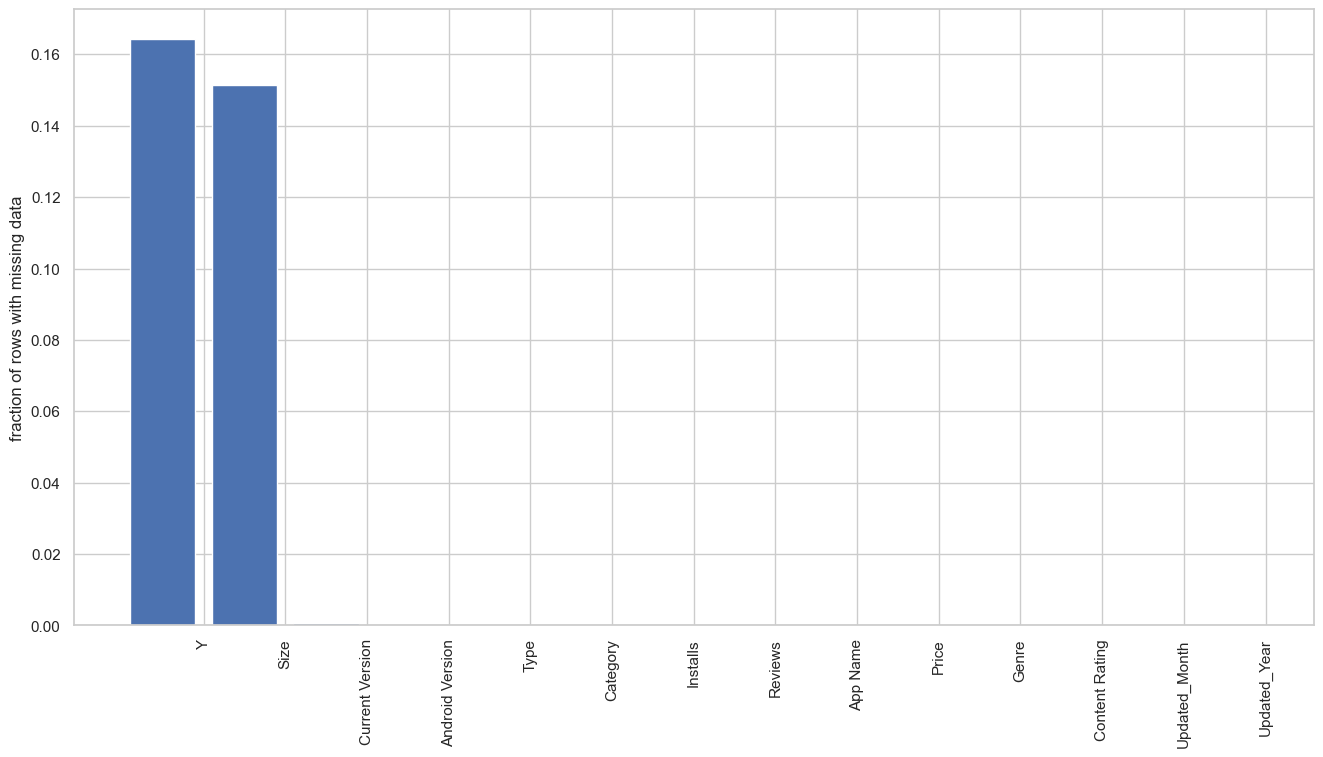

In [415]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8967 entries, 0 to 8966
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8967 non-null   object 
 1   Category         8967 non-null   object 
 2   Reviews          8967 non-null   object 
 3   Size             7608 non-null   float64
 4   Installs         8967 non-null   int64  
 5   Type             8966 non-null   object 
 6   Price            8967 non-null   float64
 7   Content Rating   8967 non-null   object 
 8   Genre            8967 non-null   object 
 9   Current Version  8960 non-null   object 
 10  Android Version  8965 non-null   object 
 11  Y                7493 non-null   float64
 12  Updated_Month    8967 non-null   int32  
 13  Updated_Year     8967 non-null   int32  
dtypes: float64(3), int32(2), int64(1), object(8)
memory usage: 910.8+ KB


In [417]:

def remove_outliers(df, column_name):

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df


In [418]:
def impute_mean(series):
    return series.fillna(series.mean())

df['Y'] = df['Y'].transform(impute_mean)


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8967 entries, 0 to 8966
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8967 non-null   object 
 1   Category         8967 non-null   object 
 2   Reviews          8967 non-null   object 
 3   Size             7608 non-null   float64
 4   Installs         8967 non-null   int64  
 5   Type             8966 non-null   object 
 6   Price            8967 non-null   float64
 7   Content Rating   8967 non-null   object 
 8   Genre            8967 non-null   object 
 9   Current Version  8960 non-null   object 
 10  Android Version  8965 non-null   object 
 11  Y                8967 non-null   float64
 12  Updated_Month    8967 non-null   int32  
 13  Updated_Year     8967 non-null   int32  
dtypes: float64(3), int32(2), int64(1), object(8)
memory usage: 910.8+ KB


In [420]:
def impute_mean(series):
    return series.fillna(series.mean())

df['Size'] = df['Size'].transform(impute_mean)

In [421]:
df.isnull().sum()

App Name           0
Category           0
Reviews            0
Size               0
Installs           0
Type               1
Price              0
Content Rating     0
Genre              0
Current Version    7
Android Version    2
Y                  0
Updated_Month      0
Updated_Year       0
dtype: int64

In [422]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)

In [423]:
df.isnull().sum()

App Name           0
Category           0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genre              0
Current Version    7
Android Version    2
Y                  0
Updated_Month      0
Updated_Year       0
dtype: int64

In [424]:
duplicate = df.duplicated()
print(duplicate.sum())

311


In [425]:
df.drop_duplicates(inplace=True)

In [426]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [427]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Size', 'Installs', 'Price', 'Y', 'Updated_Month', 'Updated_Year']

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8656 entries, 0 to 8966
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8656 non-null   object 
 1   Category         8656 non-null   object 
 2   Reviews          8656 non-null   object 
 3   Size             8656 non-null   float64
 4   Installs         8656 non-null   int64  
 5   Type             8656 non-null   object 
 6   Price            8656 non-null   float64
 7   Content Rating   8656 non-null   object 
 8   Genre            8656 non-null   object 
 9   Current Version  8649 non-null   object 
 10  Android Version  8654 non-null   object 
 11  Y                8656 non-null   float64
 12  Updated_Month    8656 non-null   int32  
 13  Updated_Year     8656 non-null   int32  
dtypes: float64(3), int32(2), int64(1), object(8)
memory usage: 946.8+ KB


In [429]:
df['Reviews'] = df['Reviews'].astype(int)

In [430]:
def impute_mean(series):
    return series.fillna(series.mean())

In [431]:
# df['reviews_per_install'] = df['Reviews'] / df['Installs'].replace(0, np.nan)
# df['reviews_per_install'] = df['reviews_per_install'].transform(impute_mean)

In [432]:
threshold = df['Reviews'].quantile(0.80)

df['Reviews_High'] = np.where(df['Reviews'] >= threshold, 1, 0)
# df['Size_High'] = np.where(df['Size'] >= threshold, 1, 0)

# threshold2 = df['Reviews'].quantile(0.20)
# df['Reviews_Low'] = np.where(df['Reviews'] <= threshold2, 1, 0)
# df['Size_Low'] = np.where(df['Size'] <= threshold2, 1, 0)

In [433]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Reviews',
 'Size',
 'Installs',
 'Price',
 'Y',
 'Updated_Month',
 'Updated_Year',
 'Reviews_High']

In [434]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['App Name',
 'Category',
 'Type',
 'Content Rating',
 'Genre',
 'Current Version',
 'Android Version']

<Axes: ylabel='Y'>

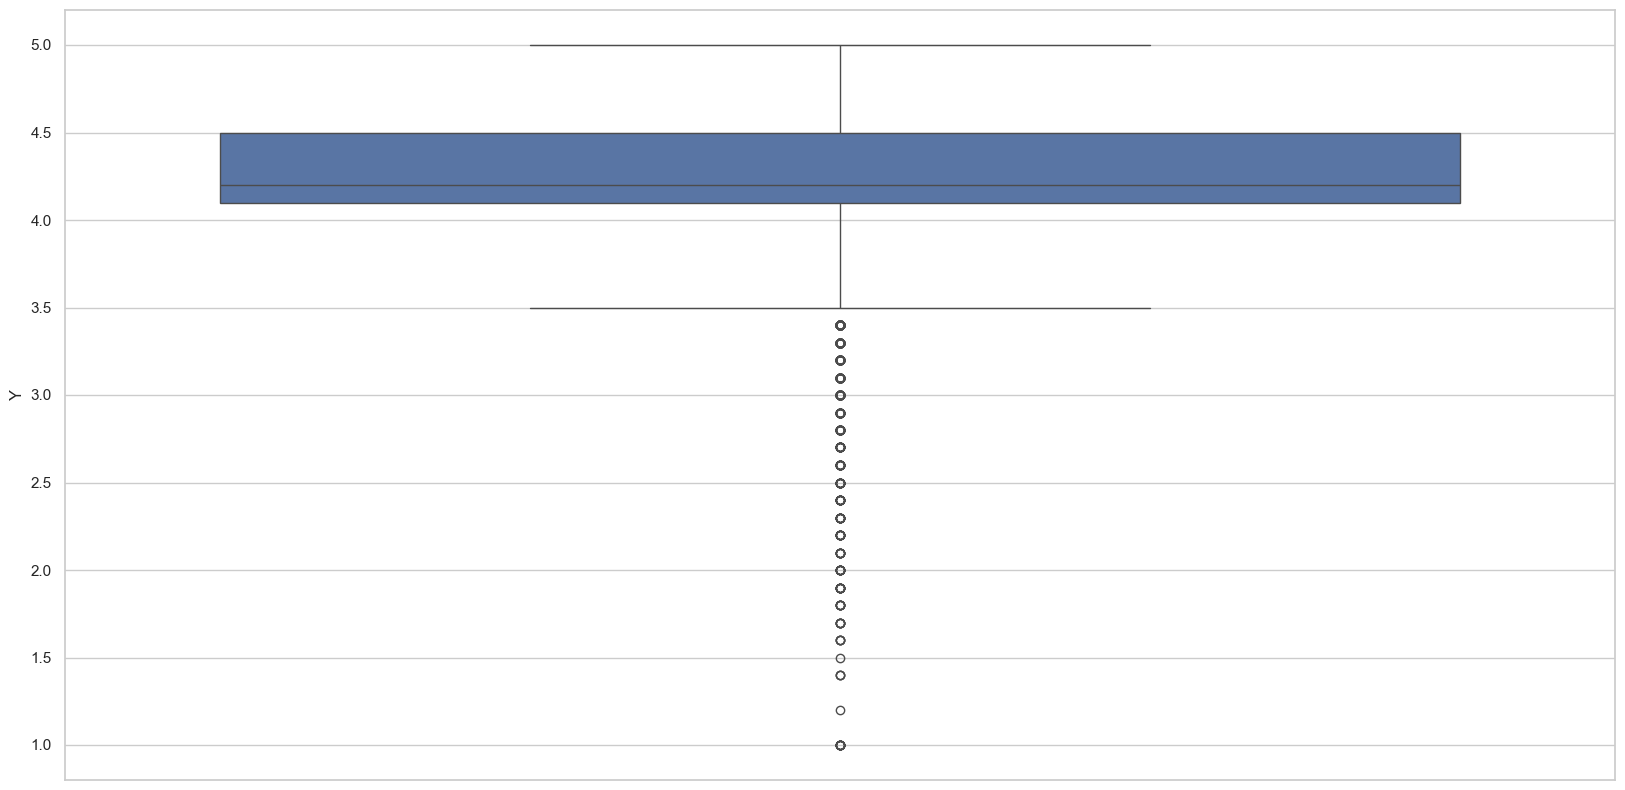

In [435]:
sns.boxplot(df["Y"])

<Axes: ylabel='Size'>

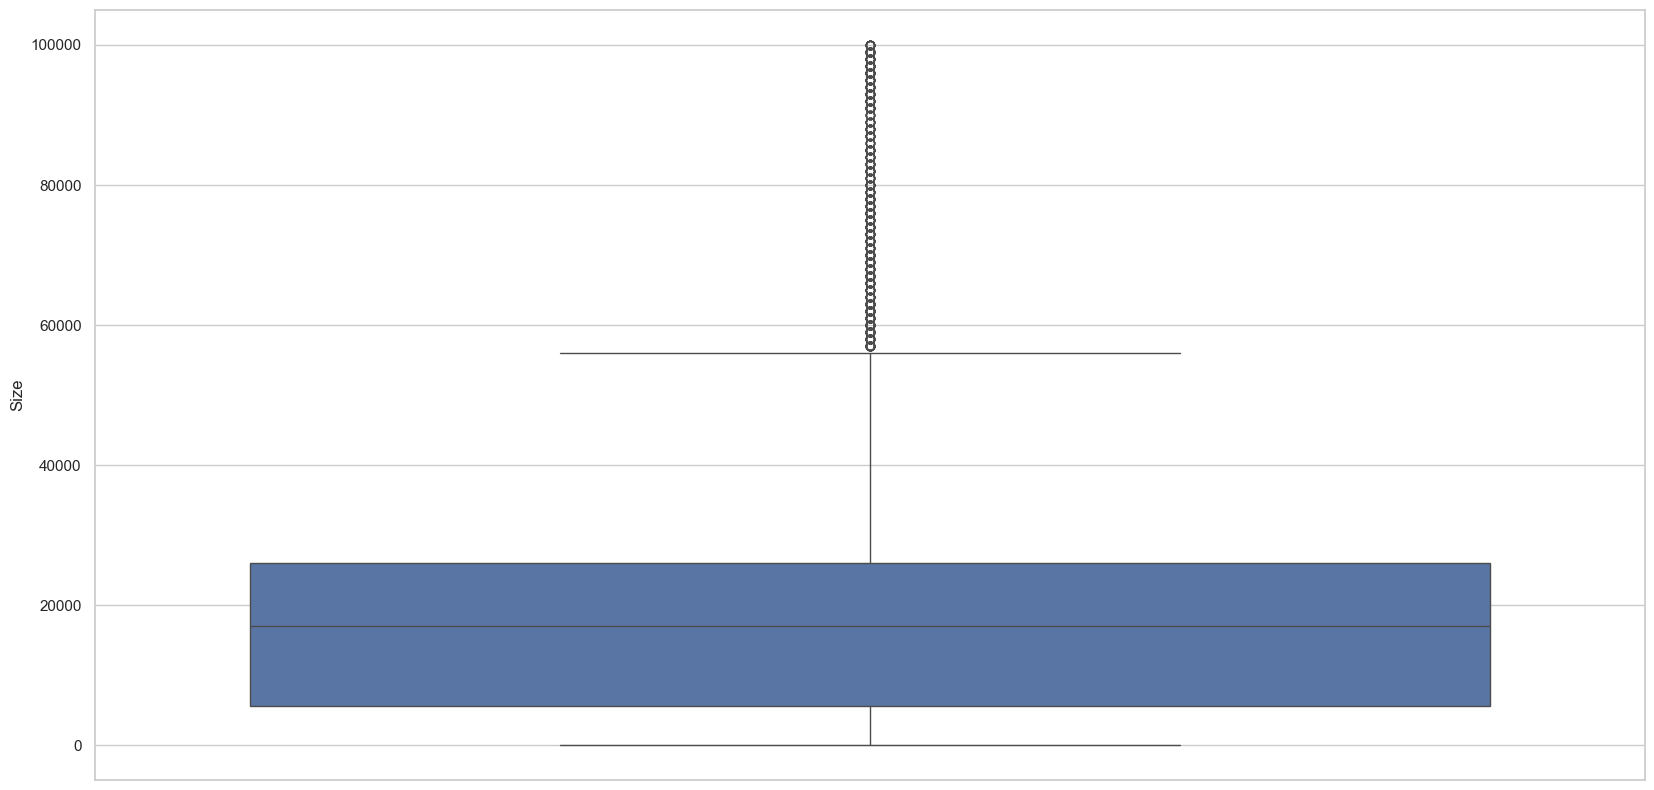

In [436]:
sns.boxplot(df["Size"])

<Axes: ylabel='Installs'>

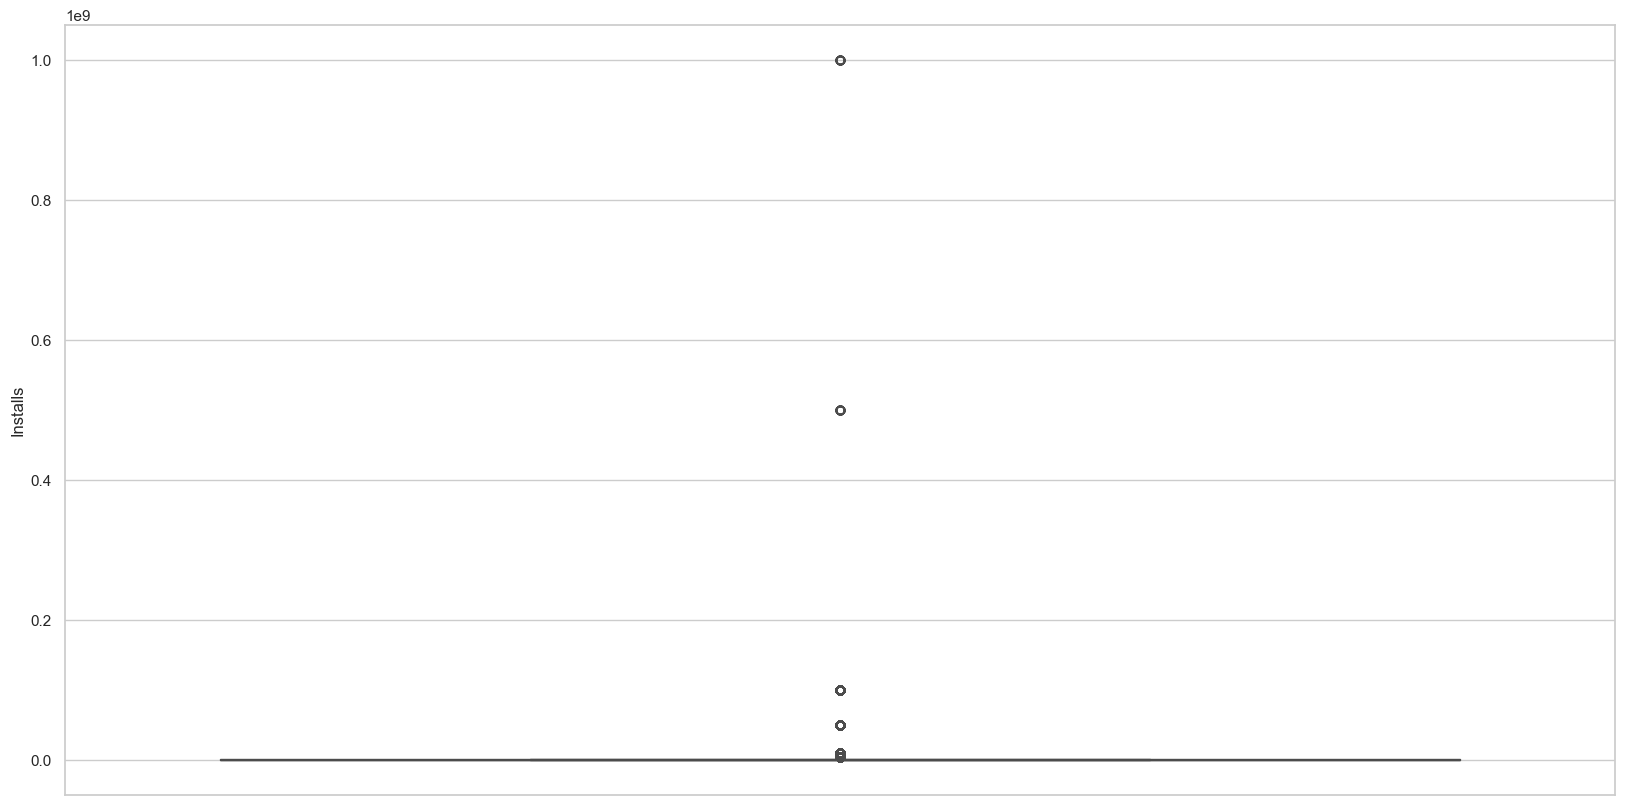

In [437]:
sns.boxplot(df["Installs"])

In [438]:
df['Category'].value_counts()

Category
FAMILY                 1589
GAME                    913
TOOLS                   705
BUSINESS                381
MEDICAL                 358
PRODUCTIVITY            333
PERSONALIZATION         331
COMMUNICATION           321
LIFESTYLE               310
SPORTS                  297
FINANCE                 294
PHOTOGRAPHY             273
HEALTH_AND_FITNESS      265
SOCIAL                  243
NEWS_AND_MAGAZINES      237
SHOPPING                189
TRAVEL_AND_LOCAL        189
BOOKS_AND_REFERENCE     187
DATING                  167
VIDEO_PLAYERS           144
MAPS_AND_NAVIGATION     117
EDUCATION               107
ENTERTAINMENT           100
FOOD_AND_DRINK           99
AUTO_AND_VEHICLES        71
LIBRARIES_AND_DEMO       70
WEATHER                  66
HOUSE_AND_HOME           66
EVENTS                   56
ART_AND_DESIGN           49
PARENTING                44
COMICS                   43
BEAUTY                   42
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

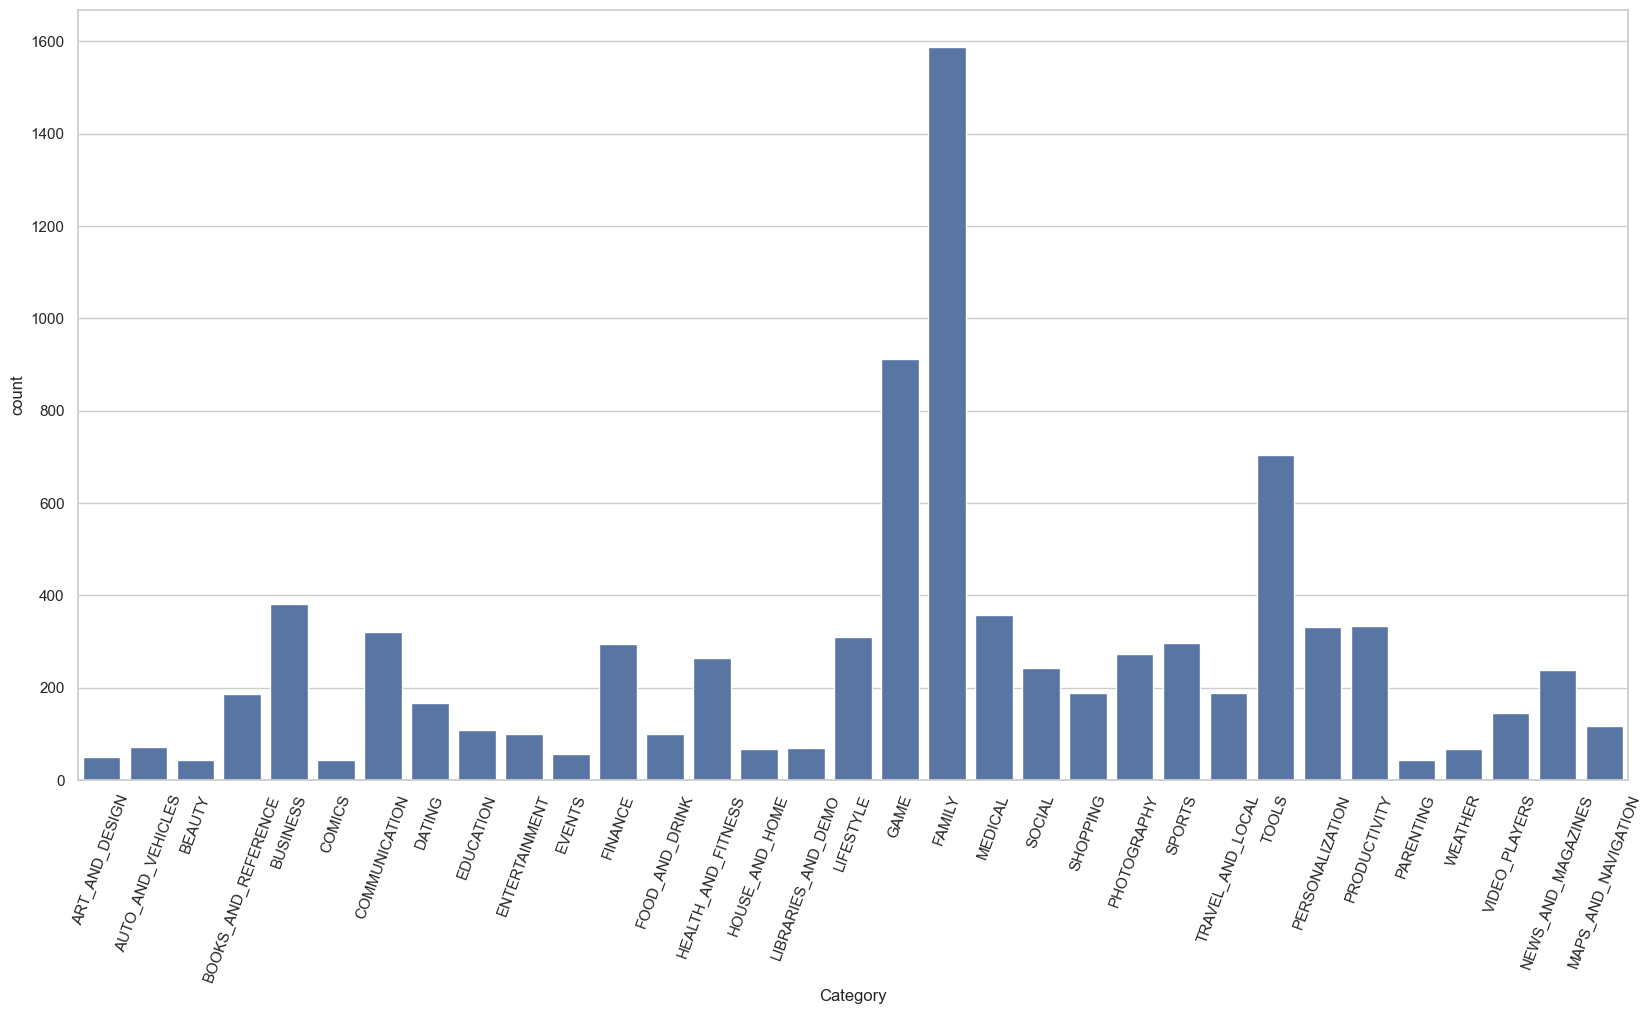

In [439]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=df)
plt.xticks(rotation=70)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'GAME'),
  Text(1, 0, 'FAMILY'),
  Text(2, 0, 'SOCIAL'),
  Text(3, 0, 'BUSINESS'),
  Text(4, 0, 'COMMUNICATION'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'HEALTH_AND_FITNESS'),
  Text(7, 0, 'LIFESTYLE'),
  Text(8, 0, 'DATING'),
  Text(9, 0, 'PHOTOGRAPHY'),
  Text(10, 0, 'SPORTS'),
  Text(11, 0, 'TRAVEL_AND_LOCAL'),
  Text(12, 0, 'TOOLS'),
  Text(13, 0, 'MEDICAL'),
  Text(14, 0, 'SHOPPING'),
  Text(15, 0, 'PERSONALIZATION'),
  Text(16, 0, 'NEWS_AND_MAGAZINES'),
  Text(17, 0, 'BOOKS_AND_REFERENCE'),
  Text(18, 0, 'FINANCE'),
  Text(19, 0, 'PRODUCTIVITY'),
  Text(20, 0, 'EVENTS'),
  Text(21, 0, 'FOOD_AND_DRINK'),
  Text(22, 0, 'ART_AND_DESIGN'),
  Text(23, 0, 'PARENTING'),
  Text(24, 0, 'AUTO_AND_VEHICLES'),
  Text(25, 0, 'EDUCATION'),
  Text(26, 0, 'VIDEO_PLAYERS'),
  Text(27, 0, 'MAPS_AND_NA

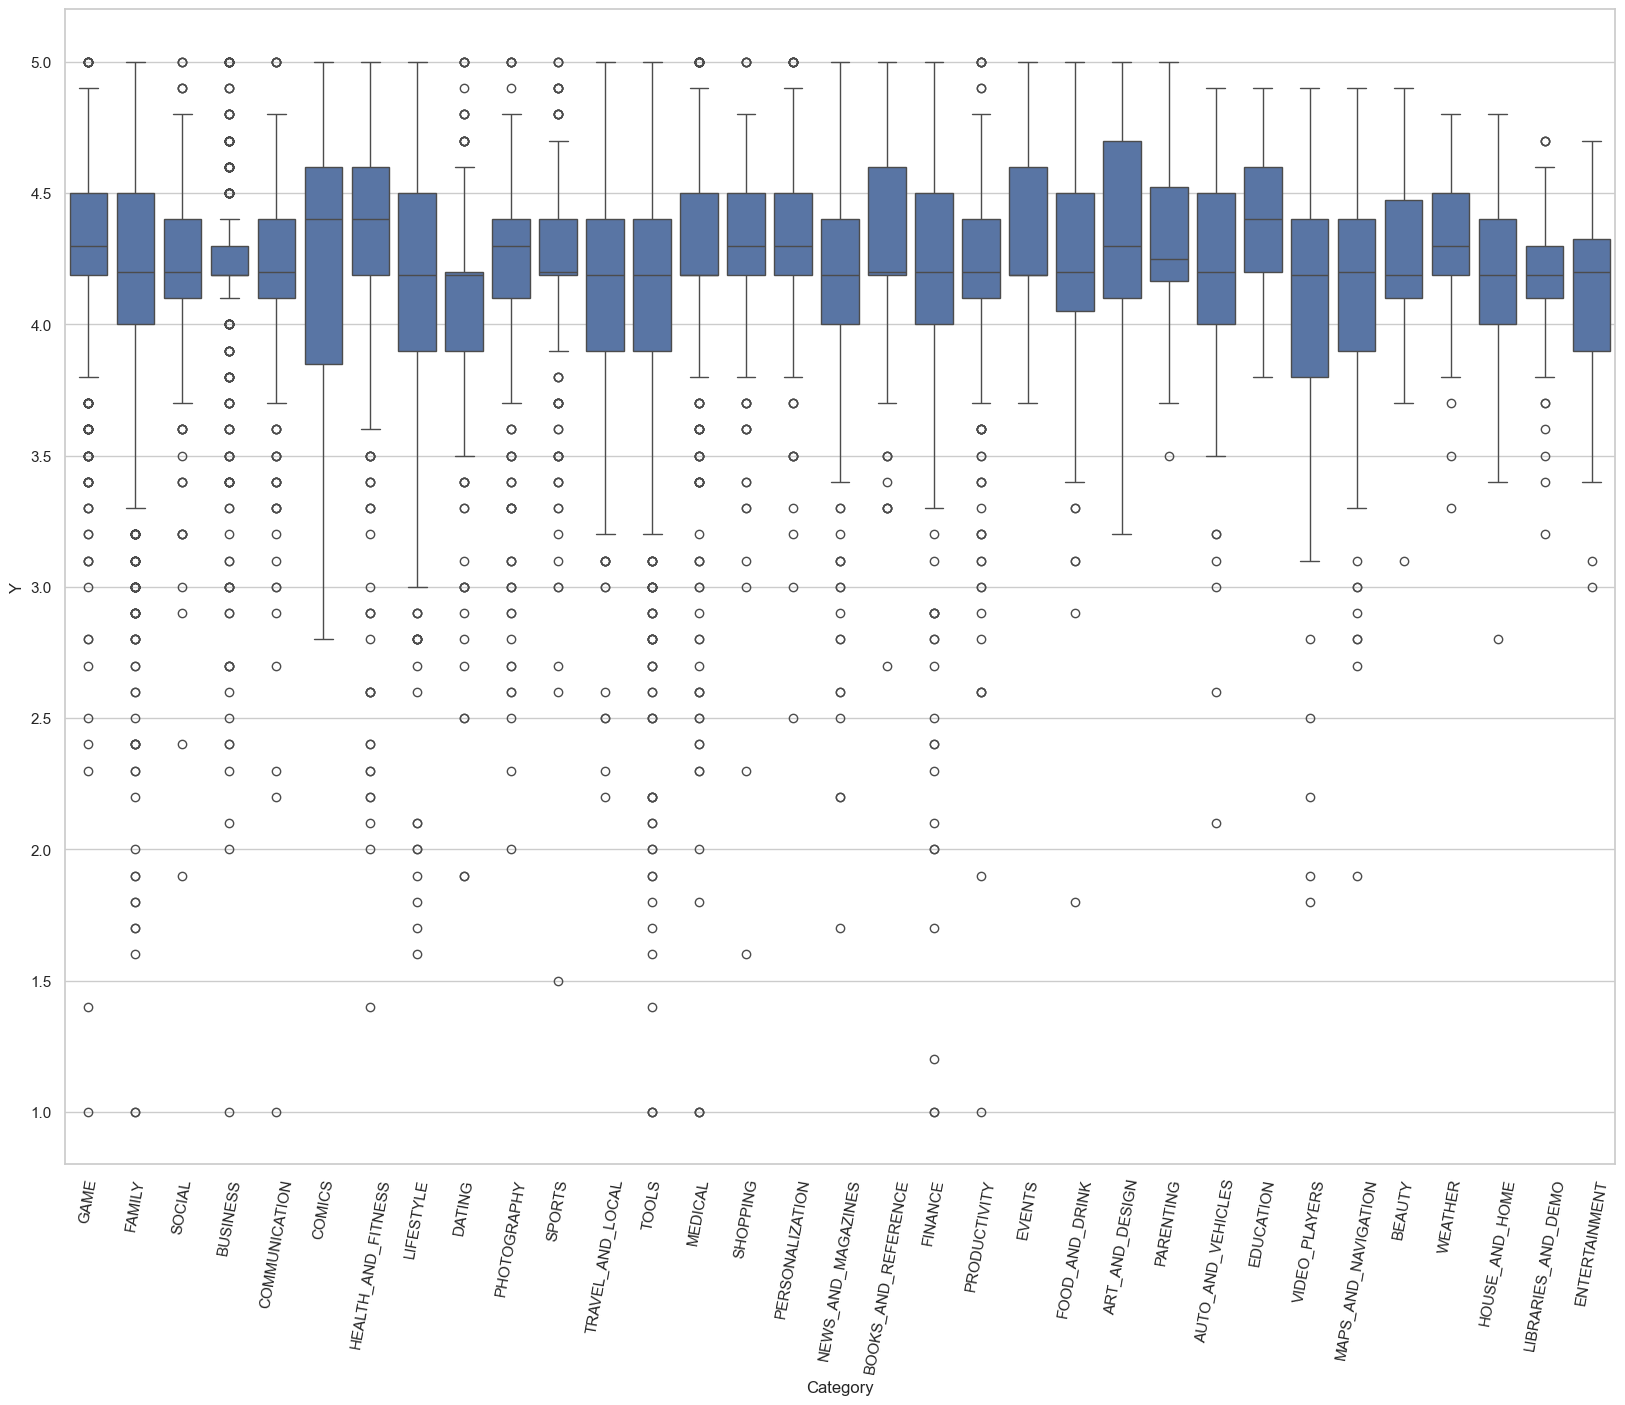

In [440]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Y',x='Category',data = df.sort_values('Y',ascending=False))
plt.xticks(rotation=80)

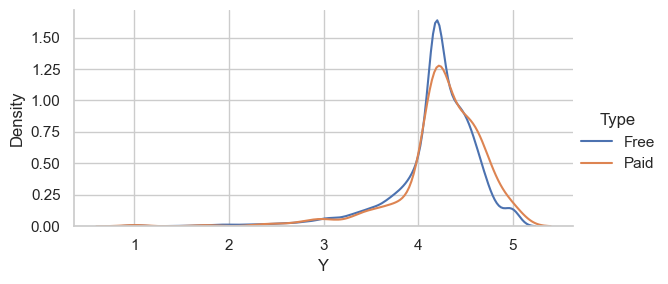

In [441]:
def kde_plot(feature):
    # Create a FacetGrid for KDE plots using Seaborn
    grid = sns.FacetGrid(df, hue="Type", aspect=2)

    # Map KDE plots for the specified feature
    grid.map(sns.kdeplot, feature)

    # Add a legend to distinguish between categories
    grid.add_legend()
kde_plot('Y')

In [442]:
df_rating_5 = df[df.Y == 5.]
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')

There are 204 apps having rating of 5.0


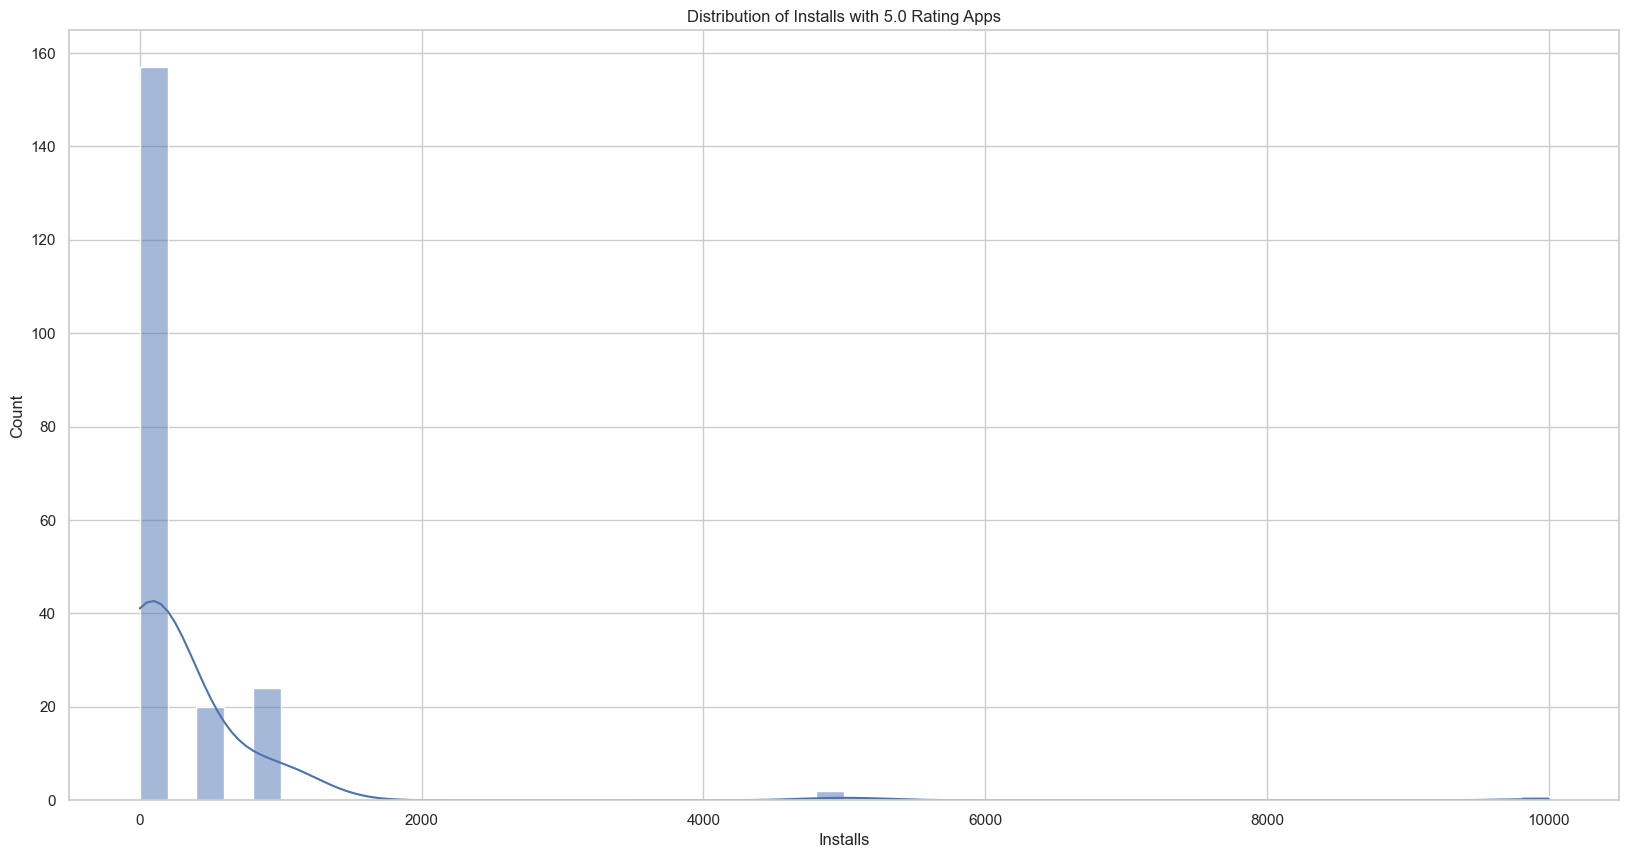

In [443]:
sns.histplot(data=df_rating_5, x='Installs', kde=True, bins=50)

plt.title('Distribution of Installs with 5.0 Rating Apps')
plt.show()

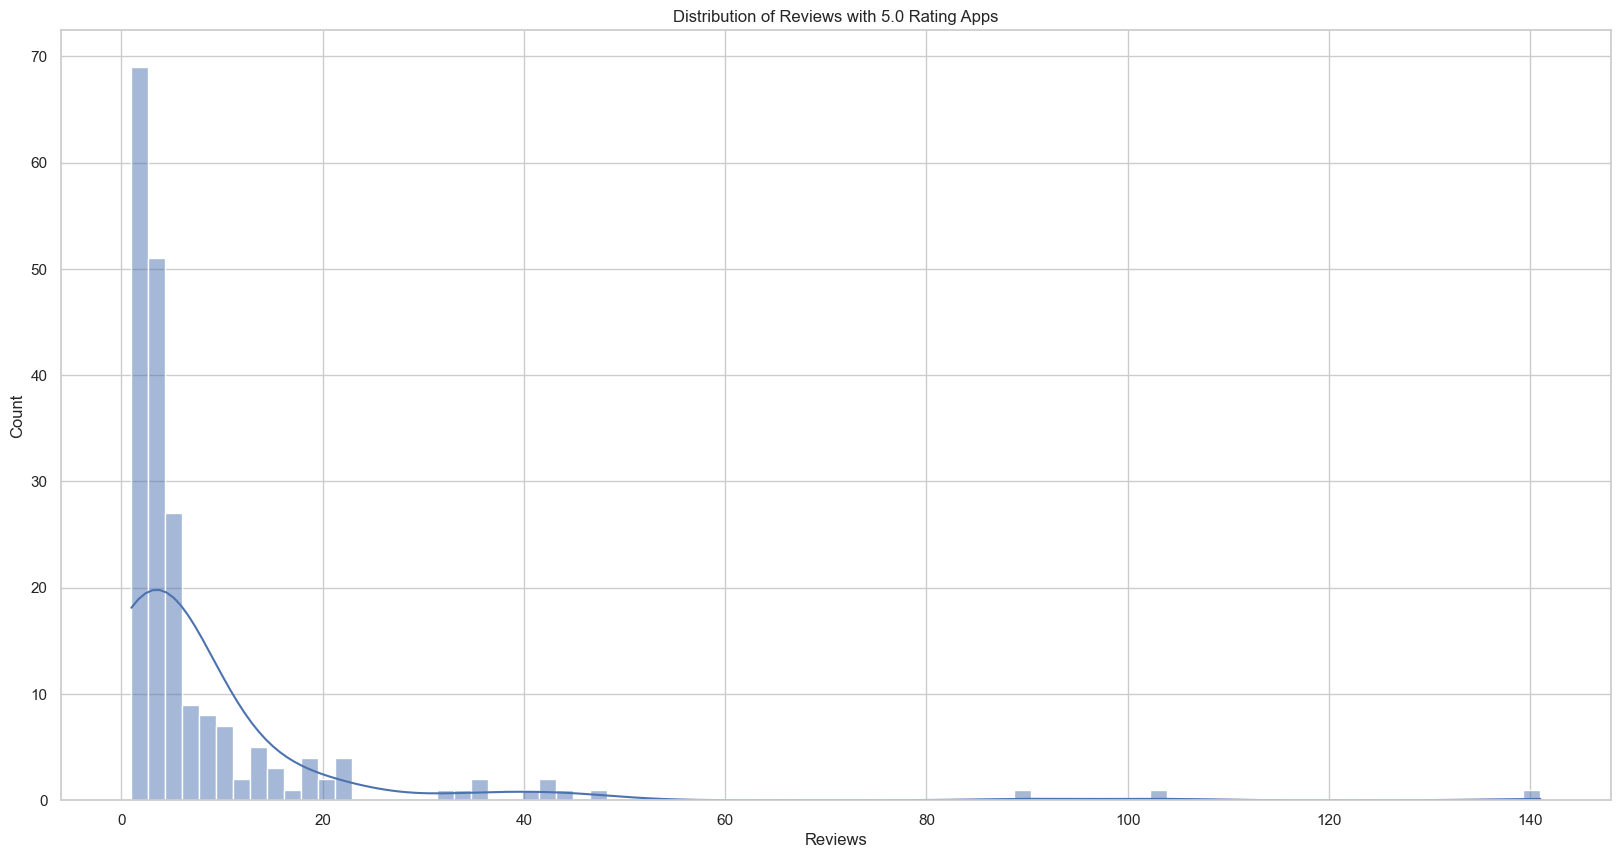

In [444]:
sns.histplot(data=df_rating_5, x='Reviews', kde=True)
plt.title('Distribution of Reviews with 5.0 Rating Apps')
plt.show()

Applications with few reviews having 5.0 ratings, which is misleading.

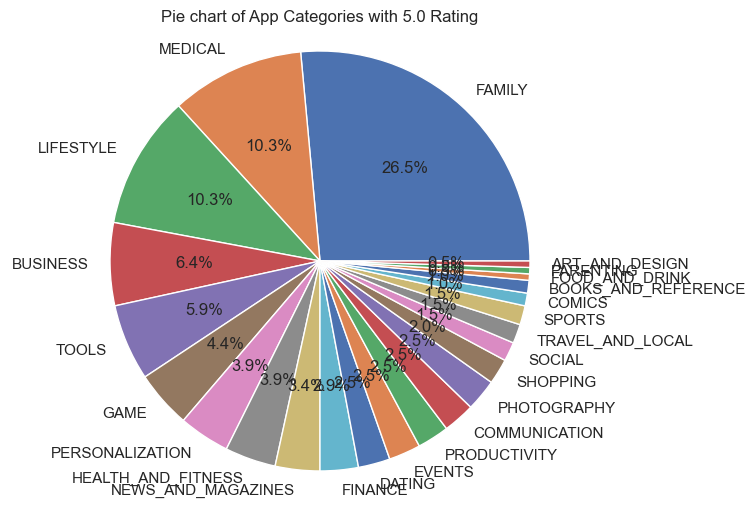

In [445]:
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.pie(df_rating_5_cat.iloc[:, 1], labels=df_rating_5_cat.iloc[:, 0], autopct='%1.1f%%')
plt.title('Pie chart of App Categories with 5.0 Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

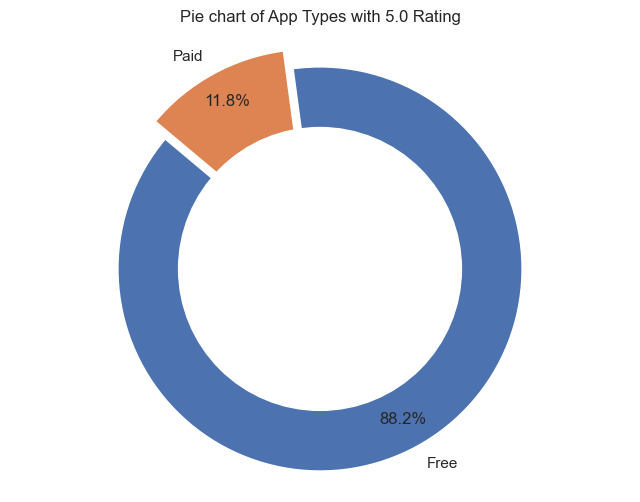

In [446]:
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
# Data for the pie chart
sizes = df_rating_5_type.iloc[:, 1]
labels = df_rating_5_type.iloc[:, 0]

# Pull a slice out by exploding it
explode = (0, 0.1)  # Adjust the second value to control the pull-out distance

# Create the pie chart with default colors
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Pie chart of App Types with 5.0 Rating')

# Show the pie chart
plt.show()

Text(0.5, 1.0, 'Time series plot of Last Updates')

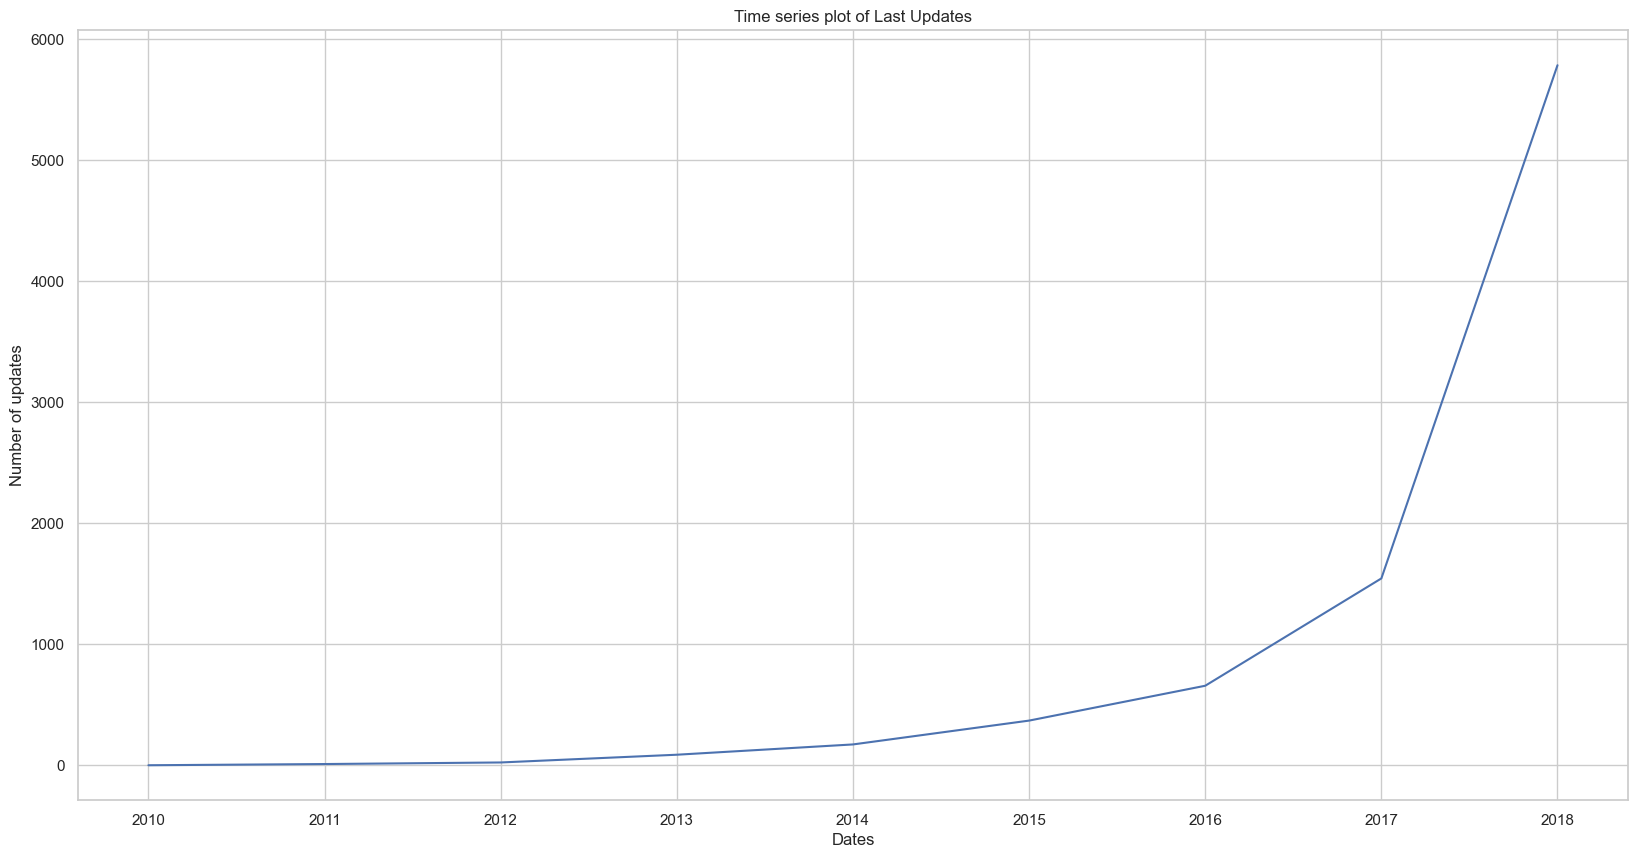

In [447]:
freq= pd.Series()
freq=df['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8656 entries, 0 to 8966
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8656 non-null   object 
 1   Category         8656 non-null   object 
 2   Reviews          8656 non-null   int64  
 3   Size             8656 non-null   float64
 4   Installs         8656 non-null   int64  
 5   Type             8656 non-null   object 
 6   Price            8656 non-null   float64
 7   Content Rating   8656 non-null   object 
 8   Genre            8656 non-null   object 
 9   Current Version  8649 non-null   object 
 10  Android Version  8654 non-null   object 
 11  Y                8656 non-null   float64
 12  Updated_Month    8656 non-null   int32  
 13  Updated_Year     8656 non-null   int32  
 14  Reviews_High     8656 non-null   int64  
dtypes: float64(3), int32(2), int64(3), object(7)
memory usage: 1014.4+ KB


In [449]:
pruned_features = ['App Name', 'Genre', 'Current Version', 'Android Version']

In [450]:
target = 'Y'

In [451]:
#df = pd.get_dummies(df, columns=['Category'], drop_first=False)

In [452]:
df

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Current Version,Android Version,Y,Updated_Month,Updated_Year,Reviews_High
0,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,3.900000,1,2018,0
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,4.700000,8,2018,1
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,4.300000,6,2018,0
3,Paper flowers instructions,ART_AND_DESIGN,167,5600.0,50000,Free,0.0,Everyone,Art & Design,1.0,2.3 and up,4.400000,3,2017,0
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19000.0,50000,Free,0.0,Everyone,Art & Design,1.1,4.0.3 and up,3.800000,4,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8962,FR Forms,BUSINESS,0,9600.0,10,Free,0.0,Everyone,Business,1.1.5,4.0 and up,4.186734,9,2016,0
8963,Sya9a Maroc - FR,FAMILY,38,53000.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,4.500000,7,2017,0
8964,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3600.0,100,Free,0.0,Everyone,Education,1.0,4.1 and up,5.000000,7,2018,0
8965,Parkinson Exercices FR,MEDICAL,3,9500.0,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,4.186734,1,2017,0


In [453]:
X = df.copy().drop(pruned_features+[target], axis=1)
y = df.copy()[target]

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [455]:
# X_train['Installs'] = X_train['Installs'].astype('category')
# X_test['Installs'] = X_test['Installs'].astype('category')

In [456]:
le_dict = defaultdict()
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    X_test[col] = le.transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas


In [457]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# encoder = OneHotEncoder()
# X_encoded = encoder.fit_transform(df['Installs'].values.reshape(-1,1)).toarray()
# X_encoded = pd.DataFrame(X_encoded, columns = ['Installs_' + str(i) for i in range(X_encoded.shape[1])])
# df = pd.concat([df.drop('Installs', axis = 1), X_encoded], axis=1)
# le = LabelEncoder()
#
# X_train['Installs'] = le.fit_transform(X_train['Installs']) # Fitting and tranforming the Train data
# X_train['Installs'] = X_train['Installs'].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas
#
# X_test['Installs'] = le.transform(X_test['Installs']) # Only transforming the test data
# X_test['Installs'] = X_test['Installs'].astype('category') # Converting the label encoded features from numerical back to categorical
# Listing numeric features to scale
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [458]:
numeric_features

Index(['Reviews', 'Size', 'Installs', 'Price', 'Updated_Year', 'Reviews_High'], dtype='object')

In [459]:
scaler = StandardScaler()

# Fitting and transforming the Training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

In [460]:
models = ['Linear', 'KNN', 'Random Forest', 'XGBRegressor', 'ElasticNet']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

In [461]:
multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [462]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
XGBRegressor  train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
ElasticNet    train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN

In [463]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [464]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)

In [465]:

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE'] = root_mean_squared_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = root_mean_squared_error(y_test, y_test_pred)

In [466]:
rf = RandomForestRegressor(n_estimators=700,  max_depth=None,min_samples_leaf=5, max_features=0.6, oob_score=True, n_jobs=-1, random_state=43)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.6, min_samples_leaf=5, n_estimators=700,
                      n_jobs=-1, oob_score=True, random_state=43)

In [467]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)

In [468]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = root_mean_squared_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = root_mean_squared_error(y_test, y_test_pred)

In [469]:
importances = rf.feature_importances_
pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

Reviews           0.326457
Size              0.194376
Category          0.143999
Installs          0.123653
Updated_Month     0.093786
Updated_Year      0.048334
Reviews_High      0.025590
Content Rating    0.018885
Price             0.017983
Type              0.006938
dtype: float64

In [470]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [471]:
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test)

In [472]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = root_mean_squared_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = root_mean_squared_error(y_test, y_test_pred)

In [473]:
xgb = XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.1,
                                        subsample=0.8, colsample_bytree=0.8,
                                         objective='reg:squarederror', n_jobs=-1, enable_categorical=True)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [474]:
df_metrics_reg.loc['XGBRegressor', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['XGBRegressor', 'test', 'R2'] = knn.score(X_test, y_test)

In [475]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

df_metrics_reg.loc['XGBRegressor', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['XGBRegressor', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['XGBRegressor', 'train', 'RMSE'] = root_mean_squared_error(y_train, y_train_pred)
df_metrics_reg.loc['XGBRegressor', 'test', 'RMSE'] = root_mean_squared_error(y_test, y_test_pred)

In [476]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha=λ, l1_ratio=α
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [477]:
df_metrics_reg.loc['Elastic Net', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Elastic Net', 'test', 'R2'] = rf.score(X_test, y_test)

y_train_pred = elastic.predict(X_train)
y_test_pred = elastic.predict(X_test)

df_metrics_reg.loc['Elastic Net', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Elastic Net', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Elastic Net', 'train', 'RMSE'] = root_mean_squared_error(y_train, y_train_pred)
df_metrics_reg.loc['Elastic Net', 'test', 'RMSE'] = root_mean_squared_error(y_test, y_test_pred)

In [478]:
df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.466
                      MAE     0.302
                      R2      0.055
              test    RMSE    0.458
                      MAE     0.292
                      R2      0.065
KNN           train   RMSE    0.403
                      MAE     0.274
                      R2      0.295
              test    RMSE    0.497
                      MAE     0.330
                      R2     -0.101
Random Forest train   RMSE    0.343
                      MAE     0.217
                      R2      0.487
              test    RMSE    0.428
                      MAE     0.273
                      R2      0.183
XGBRegressor  train   RMSE    0.342
                      MAE     0.230
                      R2      0.295
              test    RMSE    0.446
                      MAE     0.286
                      R2     -0.101
ElasticNet    train   RMSE      NaN
                      MAE       NaN
                      R2        NaN
              test    RMSE      NaN
                      MAE       NaN
                      R2        NaN
Elastic Net   train   R2      0.487
              test    R2      0.183
              train   MAE     0.304
              test    MAE     0.295
              train   RMSE    0.473
              test    RMSE    0.466

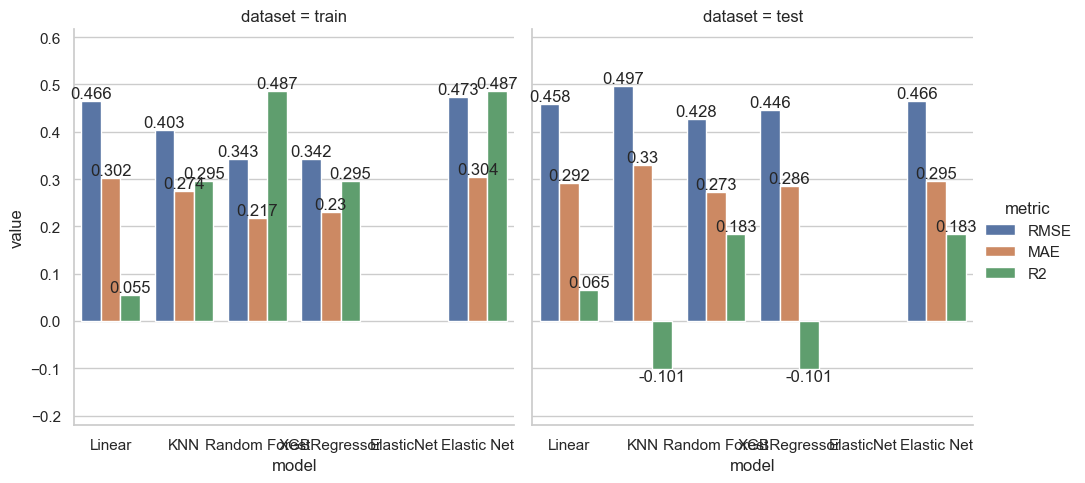

In [479]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

In [480]:
df.sample(20)

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Current Version,Android Version,Y,Updated_Month,Updated_Year,Reviews_High
8266,TRANSFORMERS: Earth Wars,FAMILY,256219,95000.000000,10000000,Free,0.0,Everyone,Strategy,1.64.0.21247,4.2 and up,4.5,7,2018,1
2858,Microsoft OneNote,PRODUCTIVITY,480640,21210.100092,100000000,Free,0.0,Everyone,Productivity,16.0.10325.20024,4.4 and up,4.4,7,2018,1
3882,YouTube TV - Watch & Record Live TV,FAMILY,38517,17000.000000,1000000,Free,0.0,Teen,Entertainment,2.29.2,5.0 and up,4.4,8,2018,0
3374,Google Drive,PRODUCTIVITY,2728941,21210.100092,1000000000,Free,0.0,Everyone,Productivity,Varies with device,Varies with device,4.4,7,2018,1
156,OfficeSuite Pro + PDF (Trial),BUSINESS,88073,21210.100092,10000000,Free,0.0,Everyone,Business,Varies with device,Varies with device,4.2,7,2018,1
8407,Premier League - Official App,SPORTS,63782,24000.000000,5000000,Free,0.0,Everyone,Sports,1.1.5,4.1 and up,4.3,8,2018,0
700,Spectrum TV,ENTERTAINMENT,46618,21210.100092,5000000,Free,0.0,Teen,Entertainment,Varies with device,Varies with device,3.4,7,2018,0
6408,Chest Tracker for Clash Royale,TOOLS,77717,14000.000000,5000000,Free,0.0,Everyone,Tools,1.2.0,4.1 and up,4.3,12,2016,0
1008,Talabat: Food Delivery,FOOD_AND_DRINK,116403,21210.100092,5000000,Free,0.0,Everyone,Food & Drink,Varies with device,Varies with device,4.5,8,2018,1
764,VH1,ENTERTAINMENT,27424,17000.000000,1000000,Free,0.0,Teen,Entertainment,11.45.0,4.4 and up,4.1,7,2018,0


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8656 entries, 0 to 8966
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8656 non-null   object 
 1   Category         8656 non-null   object 
 2   Reviews          8656 non-null   int64  
 3   Size             8656 non-null   float64
 4   Installs         8656 non-null   int64  
 5   Type             8656 non-null   object 
 6   Price            8656 non-null   float64
 7   Content Rating   8656 non-null   object 
 8   Genre            8656 non-null   object 
 9   Current Version  8649 non-null   object 
 10  Android Version  8654 non-null   object 
 11  Y                8656 non-null   float64
 12  Updated_Month    8656 non-null   int32  
 13  Updated_Year     8656 non-null   int32  
 14  Reviews_High     8656 non-null   int64  
dtypes: float64(3), int32(2), int64(3), object(7)
memory usage: 1014.4+ KB


# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [482]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.stats import ttest_ind
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from wordcloud import WordCloud
from IPython.display import display

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

# Regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import Lasso
import sklearn.svm

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


import joblib
# Hide warnings
import warnings
warnings.filterwarnings('ignore')
data_file_path = 'data/test.csv'
df = pd.read_csv(data_file_path)
df.describe()


,Reviews
count,1.873000e+03
mean,5.210296e+05
std,3.130513e+06
min,1.000000e+00
25%,1.460000e+02
50%,5.525000e+03
75%,8.354500e+04
max,6.657745e+07


In [483]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1_000
    elif 'k' in size:
        return float(size.replace('k', ''))


df['Size'] = df['Size'].apply(convert_size)


In [484]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        df[col]=df[col].str.replace(item,'')
df.head()

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version
0,Girls hairstyles 2018,BEAUTY,62,3100.0,10000,Free,0,Everyone,Beauty,"May 28, 2018",1.9.2,4.0.3 and up
1,Dairy Queen,FOOD_AND_DRINK,742,43000.0,100000,Free,0,Everyone,Food & Drink,"July 25, 2018",2.1.0,4.1 and up
2,Remote Control For All AC - Universal Remote,PRODUCTIVITY,166,6100.0,10000,Free,0,Everyone,Productivity,"July 28, 2018",1.1,4.0.3 and up
3,Ultimate Chest Tracker,PRODUCTIVITY,40328,23000.0,1000000,Free,0,Everyone,Productivity,"October 17, 2016",1.9,2.3 and up
4,Mobilight-BM,FINANCE,6,6200.0,500,Free,0,Everyone,Finance,"August 3, 2018",2.0.10,4.0.3 and up


In [485]:
df['Installs'] = df['Installs'].astype(int)

In [486]:
df['Price'] = df['Price'].astype(float)

In [487]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0      2018-05-28
1      2018-07-25
2      2018-07-28
3      2016-10-17
4      2018-08-03
          ...    
1868   2017-06-07
1869   2013-09-13
1870   2016-08-23
1871   2018-06-20
1872   2018-07-05
Name: Last Updated, Length: 1873, dtype: datetime64[ns]

In [488]:
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year
df.drop('Last Updated', axis=1, inplace=True)

In [489]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Size,336,17.939135
Current Version,1,0.053390
App Name,0,0.000000
Reviews,0,0.000000
Category,0,0.000000
Installs,0,0.000000
Type,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000
Genre,0,0.000000


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         1873 non-null   object 
 1   Category         1873 non-null   object 
 2   Reviews          1873 non-null   int64  
 3   Size             1537 non-null   float64
 4   Installs         1873 non-null   int64  
 5   Type             1873 non-null   object 
 6   Price            1873 non-null   float64
 7   Content Rating   1873 non-null   object 
 8   Genre            1873 non-null   object 
 9   Current Version  1872 non-null   object 
 10  Android Version  1873 non-null   object 
 11  Updated_Month    1873 non-null   int32  
 12  Updated_Year     1873 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(7)
memory usage: 175.7+ KB


In [491]:
def impute_mean(series):
    return series.fillna(series.mean())

df['Size'] = df['Size'].transform(impute_mean)

In [492]:
duplicate = df.duplicated()
print(duplicate.sum())

26


In [493]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Reviews', 'Size', 'Installs', 'Price', 'Updated_Month', 'Updated_Year']

In [494]:
df['Reviews'] = df['Reviews'].astype(int)

In [495]:
threshold = df['Reviews'].quantile(0.80)

df['Reviews_High'] = np.where(df['Reviews'] >= threshold, 1, 0)

In [496]:
# def impute_mean(series):
#     return series.fillna(series.mean())
#
# df['reviews_per_install'] = df['Reviews'] / df['Installs'].replace(0, np.nan)
# df['reviews_per_install'] = df['reviews_per_install'].transform(impute_mean)

In [497]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Month',
 'Updated_Year',
 'Reviews_High']

In [498]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['App Name',
 'Category',
 'Type',
 'Content Rating',
 'Genre',
 'Current Version',
 'Android Version']

Applications with few reviews having 5.0 ratings, which is misleading.

In [499]:
pruned_features = ['App Name', 'Genre', 'Current Version', 'Android Version']

In [500]:
X_test = df.copy().drop(pruned_features, axis=1)

In [501]:
X_train, gib, gib2, gib3 = train_test_split(X, y, test_size=.2, random_state=42)
le_dict = defaultdict()
features_to_encode = X_test.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_test[col] = le.transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas


In [502]:
categorical_features = features_to_encode + ['Updated_Month']
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listing numeric features to scale
numeric_features = X_test.select_dtypes(exclude=['category', 'object']).columns

In [503]:
numeric_features

Index(['Reviews', 'Size', 'Installs', 'Price', 'Updated_Year', 'Reviews_High'], dtype='object')

In [504]:
# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

In [505]:
predicted_y = rf.predict(X_test)

print(predicted_y)

[4.04093323 4.04212949 3.94400017 ... 4.34246713 4.3667131  3.97279222]


In [506]:
submission = pd.read_csv('data/SampleSubmission.csv')
submission['Y'] = predicted_y
submission.to_csv('data/SampleSubmission.csv', index=False)